In [28]:
import csv
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def interpolate_data(df, total_steps):
    #grn_data = pd.read_csv('genesABCD_data.txt', sep='\t', header=None)
    #grn_data.drop([5], axis=1, inplace=True)
    columns = df.columns
    
    times = df.index.values.tolist()
    start_time = times[0]
    end_time = times[-1]
    step_size = (end_time - start_time) / total_steps
    new_times = np.arange(start_time, end_time, step_size)
    
    new_df = pd.DataFrame(columns=columns, index=new_times)
    
    for col in columns:
        points_list = df[col].values.tolist()
        cs = CubicSpline(times, points_list)
        new_df[col] = cs(new_times)
        
    return new_df


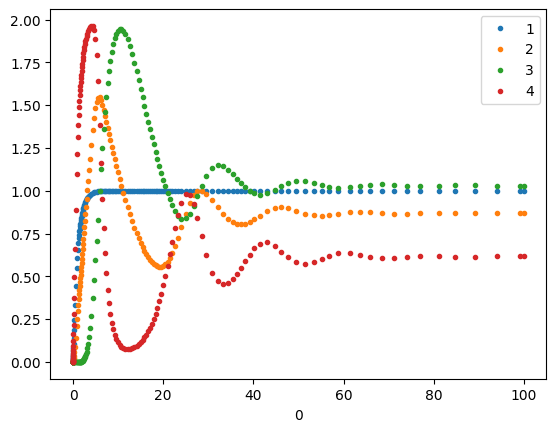

In [30]:

grn_df = pd.read_csv('genesABCD_data.txt', sep='\t', header=None, index_col=0)
grn_df.drop([5], axis=1, inplace=True)
grn_df.plot(marker='.', linestyle='none')
plt.show()

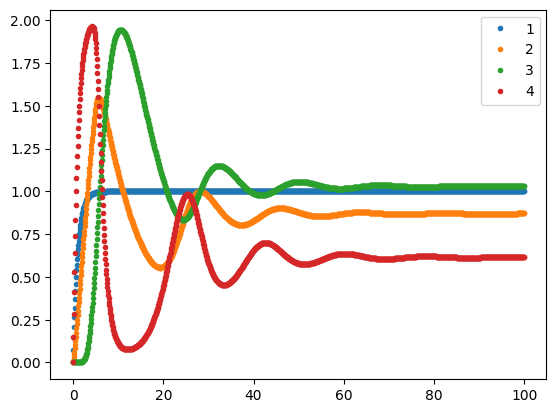

In [31]:
#grn_df = pd.read_csv('genesABCD_data.txt', sep='\t', header=None)
#grn_df.drop([5], axis=1, inplace=True)
new_df = interpolate_data(grn_df, 1296)
new_df.plot(marker='.', linestyle='none')
new_df.to_csv('interpolated_genesABCD_data.txt', sep='\t', header=None)